#EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/dataset')

Mounted at /content/drive


In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
campaign = pd.read_csv("/content/drive/MyDrive/dataset/campaign.csv",index_col= False)
customer = pd.read_csv("/content/drive/MyDrive/dataset/customer.csv",index_col= False)
customervisits = pd.read_csv("/content/drive/MyDrive/dataset/customervisits.csv",index_col= False)
staff = pd.read_csv("/content/drive/MyDrive/dataset/staff.csv",index_col= False)

##Campaign table

In [248]:
campaign.describe()

,campaignid,coupon_count,channelid,cost_per_coupon($)
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,5997.001499,27580.175912,1.500750,0.397201
std,4510.634601,26413.332339,0.501123,0.262549
min,1000.000000,0.000000,1.000000,0.000000
25%,1499.000000,1299.000000,1.000000,0.200000
50%,1999.000000,1742.000000,2.000000,0.200000
75%,10499.000000,54000.000000,2.000000,0.600000
max,10999.000000,64800.000000,3.000000,0.800000


In [249]:
campaign.rename(columns = {'cost_per_coupon($)':'cost_per_coupon'}, inplace = True)

In [250]:
campaign.channelname.unique()

array(['online', 'offline', 'walkin'], dtype=object)

In [251]:
test = campaign.query("channelname == 'online'")
test.describe()

,campaignid,coupon_count,channelid,cost_per_coupon
count,1000.000000,1000.000000,1000.0,1000.000000
mean,1499.500000,53896.600000,1.0,0.150100
std,288.819436,3302.061788,0.0,0.050025
min,1000.000000,43000.000000,1.0,0.100000
25%,1249.750000,51600.000000,1.0,0.100000
50%,1499.500000,54000.000000,1.0,0.200000
75%,1749.250000,56000.000000,1.0,0.200000
max,1999.000000,64800.000000,1.0,0.200000


1.   Online
  *   channelid = 1
  *   count = 1000
  *   cost(mean) = 0.15
2.   Offline
  *   channelid = 2
  *   count = 1000
  *   cost(mean) = 0.65
3.   Walkin
  *   channelid = 3
  *   count = 1
  *   campaignid = 1000





In [252]:
# Customervisits table has campaignid = 100, the second duplicate campaignid should be 100
duplicates = campaign[campaign.duplicated('campaignid', keep = False)]
duplicates

,campaignid,campname,coupon_count,channelid,channelname,cost_per_coupon
0,1000,40% - on one cuisine(s),49800,1,online,0.2
2000,1000,no offer - organic walkin,0,3,walkin,0.0


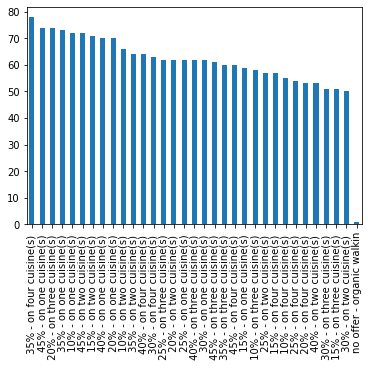

In [253]:
campaign['campname'].value_counts().plot(kind='bar')

In [254]:
campaign.loc[2000,'campaignid'] = 100

In [255]:
campaign.tail()

,campaignid,campname,coupon_count,channelid,channelname,cost_per_coupon
1996,10996,40% - on two cuisine(s),1142,2,offline,0.5
1997,10997,40% - on three cuisine(s),1414,2,offline,0.8
1998,10998,45% - on one cuisine(s),1299,2,offline,0.5
1999,10999,35% - on three cuisine(s),1342,2,offline,0.6
2000,100,no offer - organic walkin,0,3,walkin,0.0


##Customer table

In [256]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442789 entries, 0 to 442788
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   custid                442789 non-null  int64
 1   age                   442789 non-null  int64
 2   address_postalsector  442789 non-null  int64
dtypes: int64(3)
memory usage: 10.1 MB


In [257]:
customer.rename(columns = {'age':'cust_age'},inplace = True)
customer.head()

,custid,cust_age,address_postalsector
0,572635,34,27
1,183248,50,2
2,138245,31,46
3,160038,54,34
4,153004,38,19


In [258]:
#customer.custid.nunique()
customer.cust_age.max()
customer.address_postalsector.min()
a = customer.cust_age.unique()
a.sort()
a

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


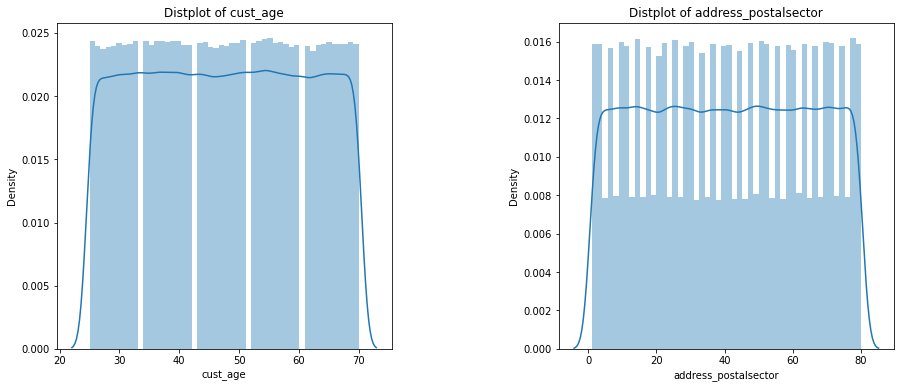

In [259]:
plt.figure(1, figsize = (15,6))
n=0
for x in ['cust_age', 'address_postalsector']:
  n+=1
  plt.subplot(1,2,n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(customer[x])
  plt.title('Distplot of {}'.format(x))
plt.show()

##Staff table

In [260]:
staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   staffid  20 non-null     int64
 1   age      20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [261]:
staff.rename(columns = {'age':'staff_age'},inplace = True)
staff.staffid.unique() #having duplicates (same id with diff age)  *Metadata shows age as 'customer present age'

array([505, 500, 515, 504, 518, 519, 517, 512, 508, 503, 502])

In [262]:
customervisits.staffid.unique() # the staffid within customervisits table seems more reliable

array([  0, 503, 504, 516, 510, 501, 511, 515, 519, 507, 500, 506, 513,
       517, 514, 508, 512, 520, 518, 505, 509, 502])

Will ignore Staff table as it doesnt provide reliable info

##Customervisits table

In [263]:
customervisits.rename(columns = {'campid':'campaignid'},inplace = True)
customervisits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899999 entries, 0 to 899998
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   custid        899999 non-null  int64  
 1   dish_cuisine  899999 non-null  object 
 2   totalbill     899999 non-null  int64  
 3   rating        899999 non-null  float64
 4   channel       899999 non-null  int64  
 5   staffid       899999 non-null  int64  
 6   campaignid    899999 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.1+ MB


customervisits.campid could be same as campaign.compaignid **check if any null after merging

In [264]:
campaign.campaignid.nunique() # no campaign id = 100   
#customervisits.campaignid.nunique()

2001

In [265]:
import numpy as np
extra_campid = np.setdiff1d(customervisits.campaignid.unique(), campaign.campaignid.unique())
#len(extra_campid)
extra_campid

array([], dtype=int64)

In [266]:
checkstaff = customervisits.staffid.unique()
checkstaff.sort()
checkstaff

array([  0, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511,
       512, 513, 514, 515, 516, 517, 518, 519, 520])

In [267]:
customervisits.head()

,custid,dish_cuisine,totalbill,rating,channel,staffid,campaignid
0,572635,"mexican,thai",465,1.5,3,0,100
1,183248,"japanese,indian,western,indian",178,1.1,3,0,100
2,138245,"indian,japanese",151,2.6,1,0,1164
3,160038,sichuan,502,4.1,1,0,1776
4,153004,"mediterranean,italian",548,4.6,3,0,100


##Merging

In [268]:
#customervisit + campaign
customervisit_camp = customervisits.merge(campaign,on='campaignid',how="left", copy =False)
customervisit_camp.info() # Check the null value in coupon_count...etc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899999 entries, 0 to 899998
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   custid           899999 non-null  int64  
 1   dish_cuisine     899999 non-null  object 
 2   totalbill        899999 non-null  int64  
 3   rating           899999 non-null  float64
 4   channel          899999 non-null  int64  
 5   staffid          899999 non-null  int64  
 6   campaignid       899999 non-null  int64  
 7   campname         899999 non-null  object 
 8   coupon_count     899999 non-null  int64  
 9   channelid        899999 non-null  int64  
 10  channelname      899999 non-null  object 
 11  cost_per_coupon  899999 non-null  float64
dtypes: float64(2), int64(7), object(3)
memory usage: 89.3+ MB


In [269]:
extracamp = customervisit_camp.query("campaignid == 100")
extracamp.describe()
#extracamp.channelname.unique()

,custid,totalbill,rating,channel,staffid,campaignid,coupon_count,channelid,cost_per_coupon
count,540084.000000,540084.000000,540084.000000,540084.0,540084.0,540084.0,540084.0,540084.0,540084.0
mean,375084.920579,374.587881,3.002365,3.0,0.0,100.0,0.0,3.0,0.0
std,158726.195179,187.853113,1.154901,0.0,0.0,0.0,0.0,0.0,0.0
min,100001.000000,50.000000,1.000000,3.0,0.0,100.0,0.0,3.0,0.0
25%,237738.750000,212.000000,2.000000,3.0,0.0,100.0,0.0,3.0,0.0
50%,375039.000000,374.000000,3.000000,3.0,0.0,100.0,0.0,3.0,0.0
75%,512718.250000,537.000000,4.000000,3.0,0.0,100.0,0.0,3.0,0.0
max,649997.000000,700.000000,5.000000,3.0,0.0,100.0,0.0,3.0,0.0


Campaign id = 100, channel = 3 means the customers who walkin without any coupon

In [270]:
#Fill all null with 0 (coupon_count,	channelid,	cost_per_coupon($))
customervisit_camp.fillna(0,inplace = True)
customervisit_camp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899999 entries, 0 to 899998
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   custid           899999 non-null  int64  
 1   dish_cuisine     899999 non-null  object 
 2   totalbill        899999 non-null  int64  
 3   rating           899999 non-null  float64
 4   channel          899999 non-null  int64  
 5   staffid          899999 non-null  int64  
 6   campaignid       899999 non-null  int64  
 7   campname         899999 non-null  object 
 8   coupon_count     899999 non-null  int64  
 9   channelid        899999 non-null  int64  
 10  channelname      899999 non-null  object 
 11  cost_per_coupon  899999 non-null  float64
dtypes: float64(2), int64(7), object(3)
memory usage: 89.3+ MB


In [271]:
# + customer
totaldf = customervisit_camp.merge(customer,on='custid',how="left", copy =False)
totaldf.drop('channel', inplace=True, axis=1)
totaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899999 entries, 0 to 899998
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   custid                899999 non-null  int64  
 1   dish_cuisine          899999 non-null  object 
 2   totalbill             899999 non-null  int64  
 3   rating                899999 non-null  float64
 4   staffid               899999 non-null  int64  
 5   campaignid            899999 non-null  int64  
 6   campname              899999 non-null  object 
 7   coupon_count          899999 non-null  int64  
 8   channelid             899999 non-null  int64  
 9   channelname           899999 non-null  object 
 10  cost_per_coupon       899999 non-null  float64
 11  cust_age              899999 non-null  int64  
 12  address_postalsector  899999 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 96.1+ MB


In [272]:
totaldf.head()

,custid,dish_cuisine,totalbill,rating,staffid,campaignid,campname,coupon_count,channelid,channelname,cost_per_coupon,cust_age,address_postalsector
0,572635,"mexican,thai",465,1.5,0,100,no offer - organic walkin,0,3,walkin,0.0,34,27
1,183248,"japanese,indian,western,indian",178,1.1,0,100,no offer - organic walkin,0,3,walkin,0.0,50,2
2,138245,"indian,japanese",151,2.6,0,1164,30% - on two cuisine(s),55200,1,online,0.2,31,46
3,160038,sichuan,502,4.1,0,1776,45% - on four cuisine(s),52000,1,online,0.1,54,34
4,153004,"mediterranean,italian",548,4.6,0,100,no offer - organic walkin,0,3,walkin,0.0,38,19


In [273]:
totaldf.describe()

,custid,totalbill,rating,staffid,campaignid,coupon_count,channelid,cost_per_coupon,cust_age,address_postalsector
count,899999.000000,899999.000000,899999.000000,899999.000000,899999.000000,899999.000000,899999.000000,899999.000000,899999.000000,899999.000000
mean,375005.282095,374.879857,2.999762,51.245081,1564.089090,16329.657906,2.300668,0.109695,47.504798,40.526573
std,158824.163241,187.882781,1.154339,153.338617,3056.891838,24760.921317,0.899511,0.196135,13.267206,23.124210
min,100000.000000,50.000000,1.000000,0.000000,100.000000,0.000000,1.000000,0.000000,25.000000,1.000000
25%,237460.000000,212.000000,2.000000,0.000000,100.000000,0.000000,1.000000,0.000000,36.000000,21.000000
50%,375019.000000,375.000000,3.000000,0.000000,100.000000,0.000000,3.000000,0.000000,48.000000,41.000000
75%,512672.500000,537.000000,4.000000,0.000000,1500.000000,51000.000000,3.000000,0.200000,59.000000,61.000000
max,650000.000000,700.000000,5.000000,520.000000,10999.000000,64800.000000,3.000000,0.800000,70.000000,80.000000


# START HERE~

##Question 1
How much have we spent on campaigns and what is the existing conversion rate? What is the current revenue from online/offline channels? 

###overall_conversion_rate 
Conversion Rate = Total number of coupons used / Total number of coupons issued * 100


In [274]:
#total coupon issued
campaign.coupon_count.sum()

55187932

In [275]:
withcoupon = customervisits.query("campaignid != 100")
len(withcoupon)

359915

In [276]:
overall_conversion = (len(withcoupon)/campaign.coupon_count.sum())*100 
overall_conversion

0.6521625053825173

The current conversion rate is 0.65%

###Conversion rate by each campaign

In [277]:
groupby_camp = customervisits.groupby(['campaignid'])['campaignid'].count() #count coupon used based on each campaign
groupby_camp = pd.DataFrame(groupby_camp)
groupby_camp = groupby_camp.rename(columns = {'campaignid': 'coupon_used'})
groupby_camp.drop(groupby_camp.index[0], inplace = True)
groupby_camp.reset_index(drop = False, inplace = True)
groupby_camp

,campaignid,coupon_used
0,1000,249
1,1001,262
2,1002,244
3,1003,279
4,1004,270
...,...,...
1995,10995,90
1996,10996,80
1997,10997,99
1998,10998,91


In [278]:
campaign1 = campaign.merge(groupby_camp,on='campaignid',how="left", copy =False)
campaign1['conversion'] = campaign1.coupon_used/campaign1.coupon_count*100
campaign1.fillna(0, inplace = True) # fill the campaignid = 100
campaign1.tail()


,campaignid,campname,coupon_count,channelid,channelname,cost_per_coupon,coupon_used,conversion
1996,10996,40% - on two cuisine(s),1142,2,offline,0.5,80.0,7.005254
1997,10997,40% - on three cuisine(s),1414,2,offline,0.8,99.0,7.001414
1998,10998,45% - on one cuisine(s),1299,2,offline,0.5,91.0,7.005389
1999,10999,35% - on three cuisine(s),1342,2,offline,0.6,94.0,7.004471
2000,100,no offer - organic walkin,0,3,walkin,0.0,0.0,0.000000


In [280]:
campaign1.sort_values('conversion', ascending=False).head(10)

,campaignid,campname,coupon_count,channelid,channelname,cost_per_coupon,coupon_used,conversion
1164,10164,30% - on one cuisine(s),999,2,offline,0.8,70.0,7.007007
1049,10049,40% - on one cuisine(s),999,2,offline,0.5,70.0,7.007007
1082,10082,10% - on two cuisine(s),999,2,offline,0.6,70.0,7.007007
1282,10282,45% - on one cuisine(s),999,2,offline,0.7,70.0,7.007007
1438,10438,20% - on one cuisine(s),942,2,offline,0.8,66.0,7.006369
1767,10767,25% - on four cuisine(s),942,2,offline,0.8,66.0,7.006369
1771,10771,35% - on one cuisine(s),1199,2,offline,0.6,84.0,7.005838
1724,10724,30% - on three cuisine(s),1199,2,offline,0.6,84.0,7.005838
1081,10081,45% - on two cuisine(s),1199,2,offline,0.8,84.0,7.005838
1083,10083,10% - on four cuisine(s),1199,2,offline,0.7,84.0,7.005838


###Total cost of campaigns

In [281]:
campaign1['cost_per_campaign'] = campaign1.cost_per_coupon*campaign1.coupon_count
total_cost = campaign1.cost_per_campaign.sum()
total_cost

8924607.3

The total cost of all campaigns is **SGD 8,924,607.30**

###Current revenue from Online/Offline (channelid = 1, 2)

In [282]:
group_channel = customervisits.groupby(['channel'])['totalbill'].sum().reset_index(name="total_revenue")
group_channel = group_channel.replace([1,2,3],['Online','Offline','Walk-in'])
group_channel

,channel,total_revenue
0,Online,101110358
1,Offline,33972217
2,Walk-in,202308921


The current revenue from online and offline channel are SGD 101,110,358 and SGD 33,972,217 respectively.

##2.	What is the organic (free walk-ins) traffic to the restaurant?

In [283]:
organic_traffic = customervisits.query("channel == 3")
organic_traffic

,custid,dish_cuisine,totalbill,rating,channel,staffid,campaignid
0,572635,"mexican,thai",465,1.5,3,0,100
1,183248,"japanese,indian,western,indian",178,1.1,3,0,100
4,153004,"mediterranean,italian",548,4.6,3,0,100
7,330837,"western,mexican",529,4.0,3,0,100
8,579388,"western,western,thai,sichuan",388,2.8,3,0,100
...,...,...,...,...,...,...,...
899992,273720,"korean,chinese,japanese,mediterranean",342,1.8,3,0,100
899993,508560,"korean,mediterranean,japanese",381,2.3,3,0,100
899996,234331,"mexican,western",236,1.3,3,0,100
899997,250494,"sichuan,italian",251,1.4,3,0,100


In [284]:
distinct_cust = organic_traffic.custid.nunique()
distinct_cust

344000

In [285]:
percentage = 100-((distinct_cust/len(organic_traffic))*100)
percentage

36.30620422008428

In [286]:
total_rev = organic_traffic.totalbill.sum()
total_rev

202308921

There are 540,084 of organic traffic and 36.31% of them revisit again after their first visit. The total revenue generated based on free walk-in is **SGD 202,308,921**

##3.	Are there patterns in the data from key variables: Customer age , customer location, staff age, road show locations targeted, cuisine and how can they be leveraged to suggest a campaign strategy to the HoM.

In [287]:
visit_count = totaldf.custid.value_counts()

In [288]:
visit_count = pd.DataFrame(visit_count)
visit_count.reset_index(drop = False, inplace = True)
visit_count.rename(columns = {'custid': 'visit_count','index': 'custid'}, inplace = True)
visit_count

,custid,visit_count
0,620530,11
1,518566,11
2,332073,10
3,516051,10
4,645354,10
...,...,...
442784,170141,1
442785,339292,1
442786,189543,1
442787,468943,1


In [289]:
totaldf1 = totaldf.merge(visit_count,on='custid',how="left", copy =False)
totaldf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899999 entries, 0 to 899998
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   custid                899999 non-null  int64  
 1   dish_cuisine          899999 non-null  object 
 2   totalbill             899999 non-null  int64  
 3   rating                899999 non-null  float64
 4   staffid               899999 non-null  int64  
 5   campaignid            899999 non-null  int64  
 6   campname              899999 non-null  object 
 7   coupon_count          899999 non-null  int64  
 8   channelid             899999 non-null  int64  
 9   channelname           899999 non-null  object 
 10  cost_per_coupon       899999 non-null  float64
 11  cust_age              899999 non-null  int64  
 12  address_postalsector  899999 non-null  int64  
 13  visit_count           899999 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 103

In [290]:
import pandas
tables_on_page = pandas.read_html('https://www.ura.gov.sg/realEstateIIWeb/resources/misc/list_of_postal_districts.htm')
location = tables_on_page[0]
location.to_json("table.json", index=False, orient='table')


In [291]:
#header = location.iloc[0]
location = location[1:]
#location.columns = header
#location.set_index('PostalDistrict')
location.rename(columns = {location.columns[0]: 'postal_district',
                           location.columns[1]: 'postal_sector',
                           location.columns[2]: 'general_location',
                           },inplace = True)
location

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_district,postal_sector,general_location
1,01,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park"
2,02,"07, 08","Anson, Tanjong Pagar"
3,03,"14,15, 16","Queenstown, Tiong Bahru"
4,04,"09, 10","Telok Blangah, Harbourfront"
5,05,"11, 12, 13","Pasir Panjang, Hong Leong Garden, Clementi Ne..."
6,06,17,"High Street, Beach Road (part)"
7,07,"18, 19","Middle Road, Golden Mile"
8,08,"20, 21",Little India
9,09,"22, 23","Orchard, Cairnhill, River Valley"
10,10,"24, 25, 26, 27","Ardmore, Bukit Timah, Holland Road, Tanglin"


In [292]:
	
location = location.assign(postal_sector=location.postal_sector.str.split(",")).explode('postal_sector')
location

,postal_district,postal_sector,general_location
1,01,01,"Raffles Place, Cecil, Marina, People's Park"
1,01,02,"Raffles Place, Cecil, Marina, People's Park"
1,01,03,"Raffles Place, Cecil, Marina, People's Park"
1,01,04,"Raffles Place, Cecil, Marina, People's Park"
1,01,05,"Raffles Place, Cecil, Marina, People's Park"
...,...,...,...
26,26,78,"Upper Thomson, Springleaf"
27,27,75,"Yishun, Sembawang"
27,27,76,"Yishun, Sembawang"
28,28,79,Seletar


In [293]:
location.head(30)
location['general_location'] = location['general_location'].str.split(',').str[0]
location

,postal_district,postal_sector,general_location
1,01,01,Raffles Place
1,01,02,Raffles Place
1,01,03,Raffles Place
1,01,04,Raffles Place
1,01,05,Raffles Place
...,...,...,...
26,26,78,Upper Thomson
27,27,75,Yishun
27,27,76,Yishun
28,28,79,Seletar


In [294]:
location['general_location'].nunique()

28

#Save dataset

In [295]:
path1 = '/content/drive/MyDrive/dataset/'

with open(path1+'fnb.csv', 'w', encoding = 'utf-8-sig') as f:
  totaldf.to_csv(f, index=False)

with open(path1+'location.csv', 'w', encoding = 'utf-8-sig') as f:
  location.to_csv(f, index=False)

with open(path1+'campaign1.csv', 'w', encoding = 'utf-8-sig') as f:
  campaign1.to_csv(f, index=False)